

$
    \xi \sim \text{multinomial}(n, \{\mu_1, \mu_2, \mu_3, \mu_4\}) =  \text{multinomial}(n, \mu^4)
$


$
    H_0 : \mu^4 = \{0.15 ,0.20, 0.30, 0.35\}
$

$
    H_1 : \mu^4 = \left\{\frac{0.15}{1+k}+\frac{k}{1+k} ,\frac{0.20}{1+k}, \frac{0.30}{1+k}, \frac{0.35}{1+k}\right\}
$

$
~~~~~~~\text{или}~\left\{\frac{0.15}{1+k},\frac{0.20}{1+k}+\frac{k}{1+k}, \frac{0.30}{1+k}, \frac{0.35}{1+k}\right\}
$

$
~~~~~~~\text{или}~\left\{\frac{0.15}{1+k},\frac{0.20}{1+k}, \frac{0.30}{1+k}+\frac{k}{1+k}, \frac{0.35}{1+k}\right\}
$

$
~~~~~~~\text{или}~\left\{\frac{0.15}{1+k},\frac{0.20}{1+k}, \frac{0.30}{1+k}, \frac{0.35}{1+k}+\frac{k}{1+k}\right\},~~~~k > 0
$

In [90]:
from scipy.stats import multinomial
import numpy
import math

Наша статистика должна быть величиной, которая хорошо характеризует отклонение нашего значения от ожидаемого. Мы хотим выявить случаи, когда доля трафика от одного из провайдеров подозрительно большая. Давайте возьмём в качестве статистики сумму квадратов отклонений наблюдаемого трафика каждого из провайдеров от исторических значений 

$ t = \left(\dfrac{x_1}{n} - 0.15\right)^2 + \left(\dfrac{x_2}{n} - 0.20\right)^2 + \left(\dfrac{x_3}{n} - 0.30\right)^2 + \left(\dfrac{x_4}{n} - 0.35\right)^2$

In [100]:
def quad_stat(providers: list) -> float:
    """
    Эта функция считает статистику описанную выше для наблюдаемых значений трафиков
    """
    a = providers[0] / sum(providers)
    b = providers[1] / sum(providers)
    c = providers[2] / sum(providers)
    d = providers[3] / sum(providers)
    return ((a - 0.15)**2 + (b - 0.20)**2 +
                     (c - 0.30)**2 + (d - 0.35)**2)

In [97]:
numpy.random.seed(42)

n = 100
p0 = [0.15, 0.20, 0.30, 0.35]
rv0 = multinomial(n, p = p0)


H0 = [quad_stat(rv) for rv in rv0.rvs(size=10000)]
alpha = 0.05
value_critical = numpy.percentile(a=H0, q=(1-alpha) * 100)

In [98]:
def power(k: float) -> float:
    """
    Эта функция рассчитывает мощность нашей статистики, используя метод Монте-Карло
    """
    numpy.random.seed(42)
    
    n_iterations = 1000
    TP = 0
    FN = 0

    for i in range(n_iterations):

        H1 = [0.15 /(1 + k) + k / (1 + k), 0.20/(1 + k),
               0.30/(1 + k), 0.35/(1 + k)]


        if (quad_stat(multinomial.rvs(n=100, 
                                      p=H1, size=1)[0]) >= value_critical):
            TP += 1
        else:
            FN += 1

    power = TP / (TP + FN)
    return power

In [99]:
print('Например, мощность при k = 20% равна {}'.format(power(0.2)))

Например, мощность при k = 20% равна 0.934


Посмотрим на график мощности нашего критерия для разных значений k от 1 до 100 процентов:

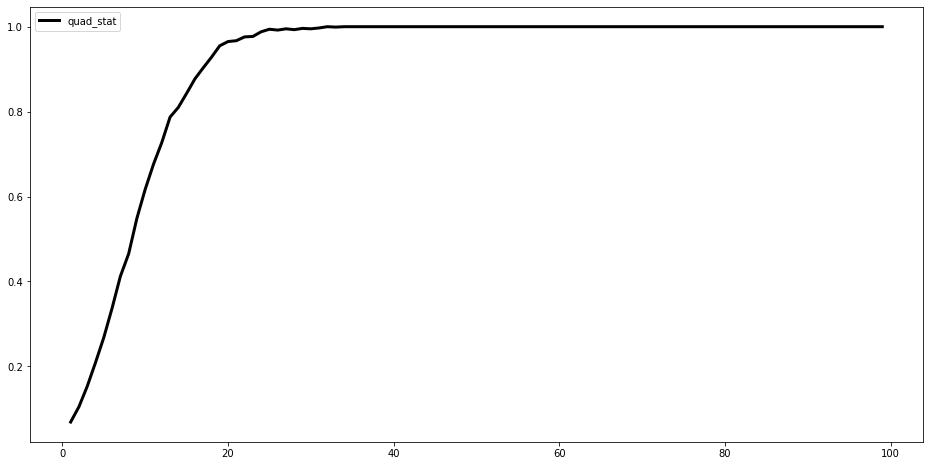

In [95]:
from matplotlib import pyplot

pyplot.figure(figsize=(16, 8))

pyplot.plot(
    range(1, 100, 1), 
    [power(k/100) for k in range(1, 100, 1)], 
    'k-', linewidth=3.0, label='quad_stat'
)

pyplot.legend(loc='best', frameon=True)
pyplot.show()

Заметим, что с ростом k наша мощность возрастает. Это означает, что чем больше "левого" трафика подмешивает поставщик, тем больше вероятность обнаружить этот обман. Видно, что примерно при k = 40 мощность достигает почти 1, то есть ошибка второго рода становится почти равная нулю.